# Business Case: Yulu - Hypothesis Testing


<h3>About Yulu</h3>
<p>Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.
Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.</p>

<h3> Problem Statement </h3>

<p> Which variables are significant in predicting the demand for shared electric cycles in the Indian market?<br>
How well those variables describe the electric cycle demands?</p>

<h4>Concepts Used:<h4>

* Bi-Variate Analysis
* 2-sample t-test: testing for difference across populations
* ANNOVA
* Chi-square

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.

Try establishing a relation between the dependent and independent variable (Dependent <b>`Count`</b> & Independent: Workingday, Weather, Season etc)

Select an appropriate test to check whether:

* Working Day has effect on number of electric cycles rented

* No. of cycles rented similar or different in different seasons

* No. of cycles rented similar or different in different weather

* Weather is dependent on season (check between 2 predictor variable)

`NOTE`<br>
1. Set up Null Hypothesis (H0)

2. State the alternate hypothesis (H1)

3. Check assumptions of the test (Normality, Equal Variance). You can check it using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test (optional)

4. Please continue doing the analysis even if some assumptions fail (levene’s test or Shapiro-wilk test) but double check using visual analysis and report wherever necessary

5. Set a significance level (alpha)

6. Calculate test Statistics. Decision to accept or reject null hypothesis. Inference from the analysis. </p>

About the file

Column Profiling:

| Feature     | Description                     |
| :---------- | :------------------------------ |
| `datetime`  | datetime                        |
| `season`    | season (1: spring, 2: summer, 3: fall, 4: winter) |
| `holiday`   | whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule) |
|`workingday` | if day is neither weekend nor holiday is 1, otherwise is 0|
|`weather`    | 1: Clear, Few clouds, partly cloudy, partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
|`temp`       | temperature in Celsius |
|`atemp`      | feeling temperature in Celsius |
|`humidity`   | humidity |
|`windspeed`  | wind speed |
|`casual`     | count of casual users |
|`registered` | count of registered users |
|`count`      | count of total rental bikes including both casual and registered |

## Data Exploration

In [1]:
# importing necessary libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/content/yulu_bike_sharing_dataset.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# shape of the data
print(f'No. pf rows: {data.shape[0]}')
print(f'No. of columns: {data.shape[1]}')

No. pf rows: 10886
No. of columns: 12


In [ ]:
# data types of the columns
print(data.dtypes)

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object


The `datetime` columns is a object data type which needs to be changed to <b> datetime </b> type.

The columns `season`, `holiday`, `workingday`, and `weather` are in <b> int64 </b> format, which can changed into categorical format for better performance.

In [3]:
 #converting  col(datetime) to standard datetime dtype

data['datetime']=pd.to_datetime(data['datetime'])

# converting numbers of season to category
data['season']= data['season'].map({
    1: 'spring',
    2: 'summmer',
    3: 'fall',
    4: 'winter'
})

# converting the numbers of weather tp category
data['weather']= data['weather'].map({
    1: 'clear/partly cloudy',
    2: 'cloudy/mist',
    3: 'light rain/snow',
    4: 'heavy rain/snow/thunderstorm'
})

cols=['holiday','workingday']
for col in cols:
  data[col]=data[col].astype('object')

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,spring,0,0,clear/partly cloudy,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,spring,0,0,clear/partly cloudy,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,spring,0,0,clear/partly cloudy,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,spring,0,0,clear/partly cloudy,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,spring,0,0,clear/partly cloudy,9.84,14.395,75,0.0,0,1,1


### Extracting new columns

In [4]:
def am_or_pm(time_value):
    time = time_value.time()
    if time >= pd.to_datetime('12:00:00').time():
        return 'pm'
    else:
        return 'am'

In [5]:
data['time']= data['datetime'].dt.time
data['am_or_pm']= data['datetime'].apply(am_or_pm)

In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,time,am_or_pm
0,2011-01-01 00:00:00,spring,0,0,clear/partly cloudy,9.84,14.395,81,0.0,3,13,16,00:00:00,am
1,2011-01-01 01:00:00,spring,0,0,clear/partly cloudy,9.02,13.635,80,0.0,8,32,40,01:00:00,am
2,2011-01-01 02:00:00,spring,0,0,clear/partly cloudy,9.02,13.635,80,0.0,5,27,32,02:00:00,am
3,2011-01-01 03:00:00,spring,0,0,clear/partly cloudy,9.84,14.395,75,0.0,3,10,13,03:00:00,am
4,2011-01-01 04:00:00,spring,0,0,clear/partly cloudy,9.84,14.395,75,0.0,0,1,1,04:00:00,am


In [ ]:
print(data.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
time          0
am_or_pm      0
dtype: int64


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
print(data.nunique())

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
time             24
am_or_pm          2
dtype: int64


## Data Analysis

### Univariate Analysis

In [ ]:
data.describe()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [6]:
num_cols = data.select_dtypes(exclude = ['object', 'datetime']).columns
num_cols = num_cols.to_list()
cat_cols = data.select_dtypes(include = ['object']).columns
cat_cols = cat_cols.to_list()
print(num_cols)
print(cat_cols)

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
['season', 'holiday', 'workingday', 'weather', 'time', 'am_or_pm']


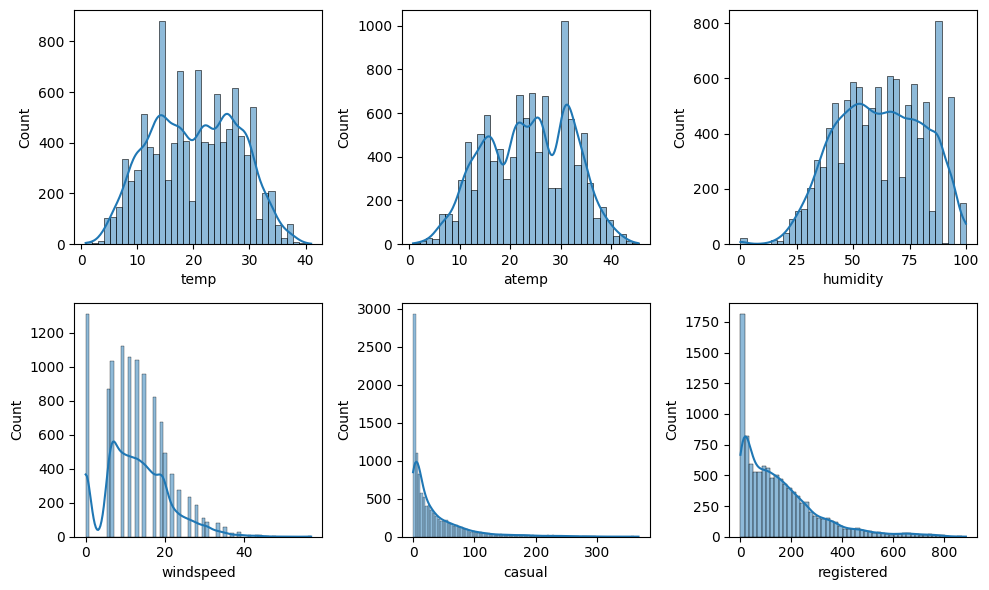

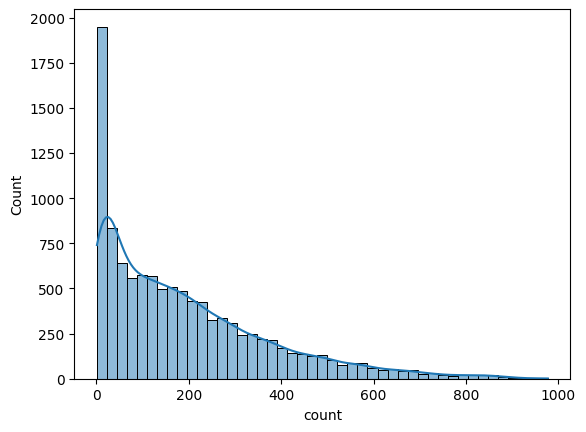

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (10, 6))
index = 0
for i in range(2):
  for j in range(3):
    sns.histplot(data[num_cols[index]], ax = ax[i][j], kde = True)
    index += 1
plt.tight_layout()
plt.show()
sns.histplot(data[num_cols[-1]], kde = True)
plt.show()

### Insights

1. casual, registered and count somewhat looks like Log Normal Distribution
2. temp, atemp and humidity looks like they follows the Normal Distribution.
3. windspeed follows the binomial distribution

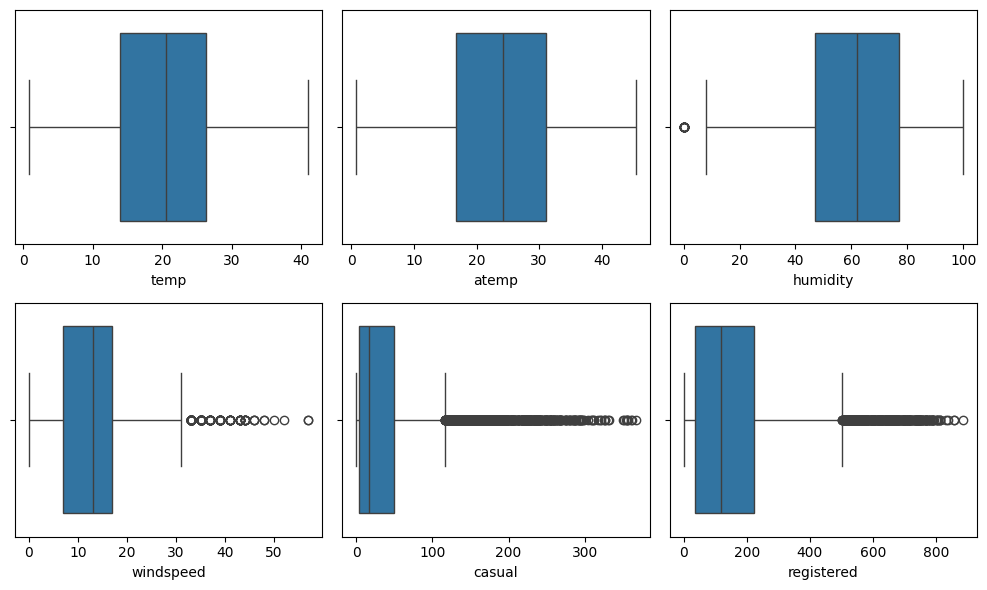

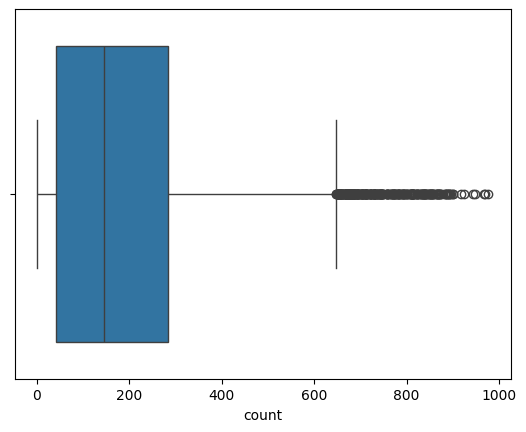

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (10, 6))
index = 0
for i in range(2):
  for j in range(3):
    sns.boxplot(x = data[num_cols[index]], ax = ax[i][j])
    index += 1
plt.tight_layout()
plt.show()
sns.boxplot(x = data[num_cols[-1]])
plt.show()

### Insights

 windspeed, casual, registered and count have outliers in the data

In [7]:
cat_cols.remove('time')
print(cat_cols)

['season', 'holiday', 'workingday', 'weather', 'am_or_pm']


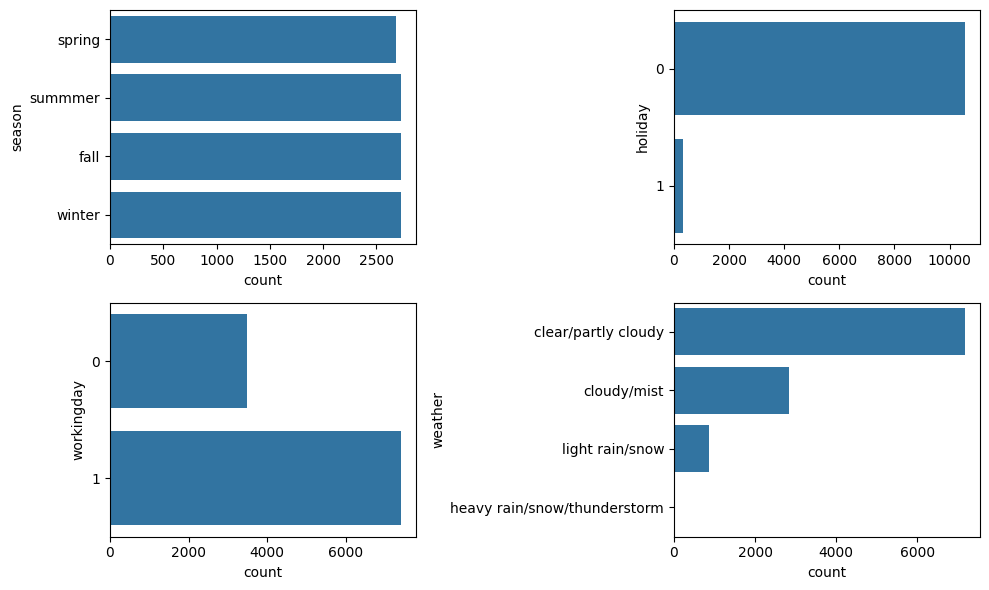

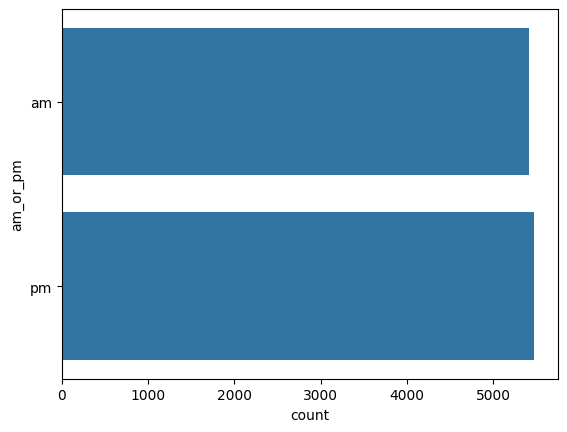

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (10, 6))
index = 0
for i in range(2):
  for j in range(2):
    sns.countplot(y = data[cat_cols[index]], ax = ax[i][j])
    index += 1
plt.tight_layout()
plt.show()
sns.countplot(y = data[cat_cols[-1]])
plt.show()

## Bivariate Analysis

Dependent Variable : `count`

### Categoriacl Columns Vs count

In [ ]:
cat_cols

['season', 'holiday', 'workingday', 'weather', 'am_or_pm']

### Season

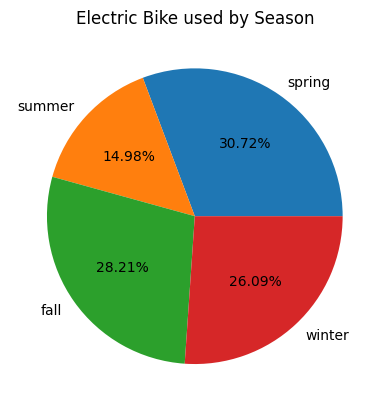

In [ ]:
plt.pie(data.groupby('season')['count'].sum(), labels = ['spring', 'summer', 'fall', 'winter'], autopct = '%.2f%%')
plt.title("Electric Bike used by Season")
plt.show()

### am_or_pm

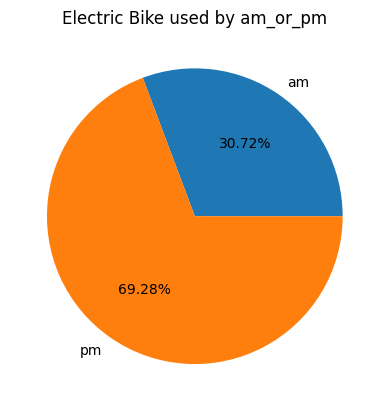

In [ ]:
plt.pie(data.groupby('am_or_pm')['count'].sum(), labels = ['am', 'pm'], autopct = '%.2f%%')
plt.title("Time at which Electric Bike are used")
plt.show()

### workingday

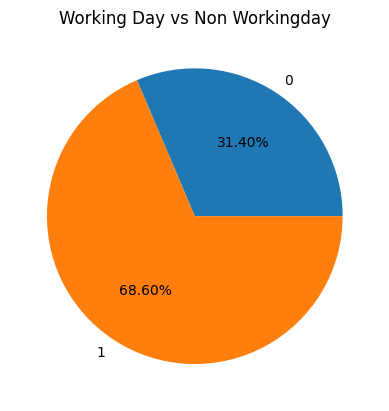

In [ ]:
plt.pie(data.groupby('workingday')['count'].sum(), labels = list(data['workingday'].unique()), autopct = '%.2f%%')
plt.title("Working Day vs Non Workingday")
plt.show()

### holiday


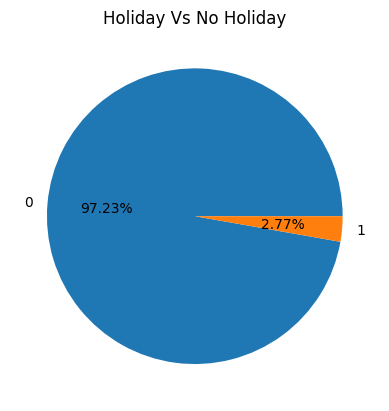

In [ ]:
plt.pie(data.groupby('holiday')['count'].sum(), labels = list(data['holiday'].unique()), autopct = '%.2f%%')
plt.title("Holiday Vs No Holiday")
plt.show()

### weather

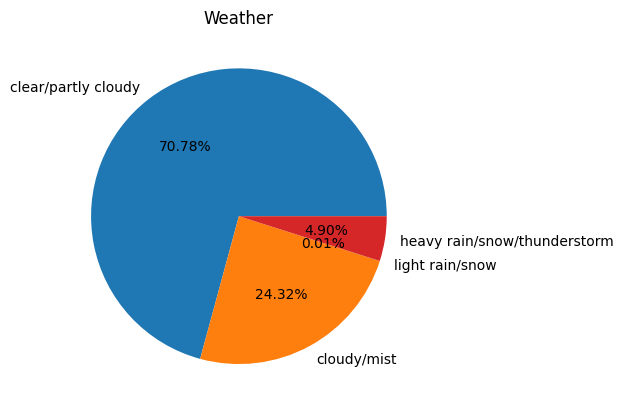

In [ ]:
plt.pie(data.groupby('weather')['count'].sum(), labels = list(data['weather'].unique()), autopct = '%.2f%%')
plt.title("Weather")
plt.show()

## Insights

* <b>Spring</b>, <b> Fall</b>, <b> Winter </b> are the major contributing season for rental business.
* The use of bikes is maximum afternoon.
* Working day is the major source for bike rental income.
* <b>Clear/Partly Cloudy </b> weather is good for the business.

Since the the rented bikes are maximum after noon time, let's see which hour gives the high counts.

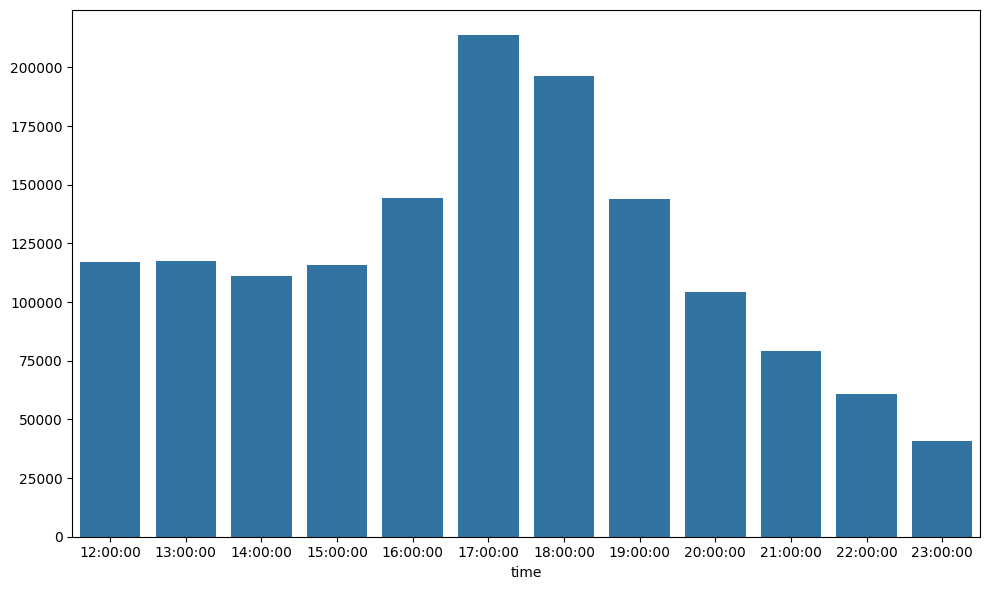

In [ ]:
df_1 = data[data['am_or_pm'] == 'pm']
plt.figure(figsize = (10, 6))
sns.barplot(x = df_1.groupby('time')['count'].sum().index, y = df_1.groupby('time')['count'].sum().values)
plt.tight_layout()
plt.show()

The time between <b> 17:00:00</b> and <b>18:00:00</b> gives the maximum numner of customers.

## Numerical Columns Vs count

In [ ]:
num_cols

['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

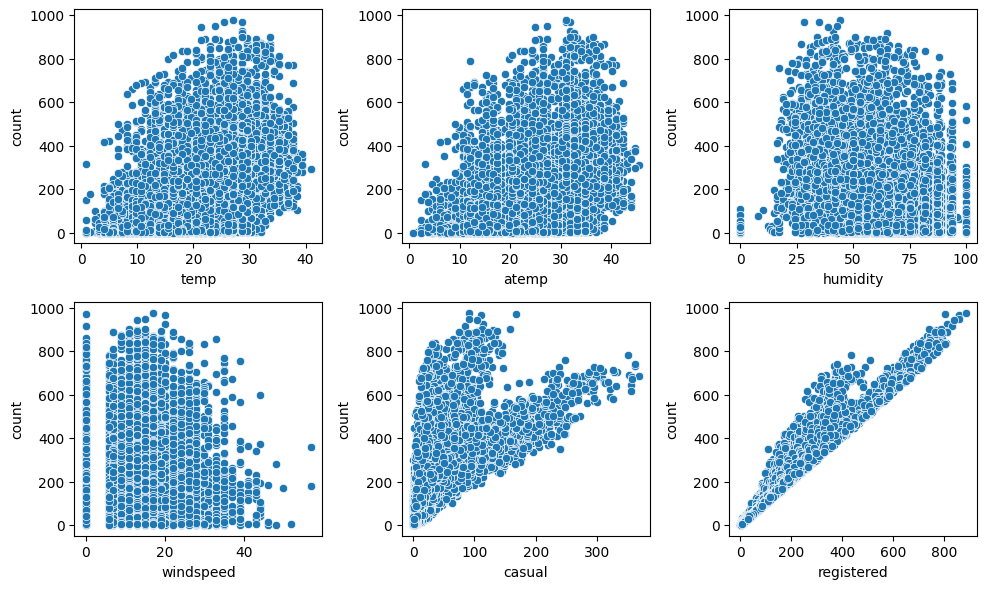

In [ ]:
fig, ax = plt.subplots(2, 3, figsize = (10, 6))
index = 0
for i in range(2):
  for j in range(3):
    sns.scatterplot(x = data[num_cols[index]], y = data['count'], ax = ax[i][j])
    index += 1
plt.tight_layout()
plt.show()

### Insights

* <b>temp</b>, <b>atemp</b>, and <b> humdity</b> shows no relation with the count column.
* <b>windspeed</b> shows, if the speed is low, there are mosre chances of renting a bike.
* <b>casual</b> and <b> registered</b> have some kind of positive relation with the `count` column.

## Hypothesis Testing

1. Working Day has effect on number of electric cycles rented.


```
H0: There is no significant differnce in demand for bike on weekdays and weekends.
H1: There is a significant differnce in demand for bike on weekdays and weekends.
```
Steps:
1. Normality Check - Perform Shapiro-Silk Test or using Q-Q plot
2. Variance Check - Perform Levene Test

if the data follows both the test, perform 2 Sample T-Test else, perform Mann Whitney U test.

* Normalty Check:
```
H0: Data follows Gaussian Distribution
H1: Data does not follows Gaussian Distribution
```
* Variance Check:
```
H0: Variance are equal
H1: Variance are not equal
```





In [8]:
# Normality Check
from scipy.stats import shapiro
group = data['workingday'].unique()
alpha = .05

for i in group:
  data_1 = data[data['workingday'] == i]['count']
  stat, pval = shapiro(data_1)
  print(f'Working Day : {i}')
  print(f'stat : {stat} \np value: {pval}')
  if pval > alpha:
    print('Data follows Gaussian Distribution')
  else:
    print('Data does not follows Gaussian Distribution')
  print('\n')


Working Day : 0
stat : 0.885211755076074 
p value: 4.4728547627911074e-45
Data does not follows Gaussian Distribution


Working Day : 1
stat : 0.8702545795617624 
p value: 2.2521124830019574e-61
Data does not follows Gaussian Distribution




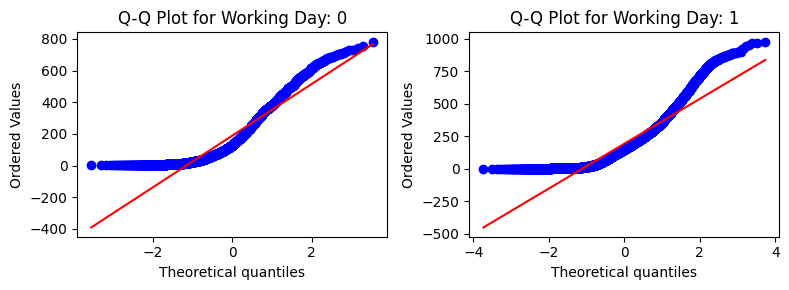

In [9]:
import scipy.stats as stats
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

# Iterate through the groups to generate Q-Q plots
for idx, i in enumerate(group):
    data_1 = data[data['workingday'] == i]['count']

    # Create Q-Q plot on respective subplot axis
    stats.probplot(data_1, dist="norm", plot=axes[idx])

    # Set title for each subplot
    axes[idx].set_title(f'Q-Q Plot for Working Day: {i}')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

In [10]:
# Variance Check
from scipy.stats import levene
alpha = .05
data_1 = data[data['workingday'] == 0]['count']
data_2 = data[data['workingday'] == 1]['count']
stat, pval = levene(data_1, data_2)

print(f'stat : {stat} \np value: {pval}')
if pval < alpha:
  print('Variance are not equal')
else:
  print('Variance are equal')

stat : 0.004972848886504472 
p value: 0.9437823280916695
Variance are equal


***From the above test applied we find out that the data do not follow Gaussian Distribution although Variances are equal.***

Applying `Mann Whitney U Test` for the test.

In [11]:
from scipy.stats import mannwhitneyu
alpha = .05
data_1 = data[data['workingday'] == 0]['count']
data_2 = data[data['workingday'] == 1]['count']
stat, pval = mannwhitneyu(data_1, data_2)
print(f'stat : {stat} \np value: {pval}')
if pval < alpha:
  print('There is significant differnce in demand for bike on weekdays and weekends')
else:
  print('There is no significant differnce in demand for bike on weekdays and weekends')

stat : 12880792.5 
p value: 0.9679139953914079
There is no significant differnce in demand for bike on weekdays and weekends


2. No. of cycles rented similar or different in different seasons


```
H0: There is no significant differnce in demand for bike in different seasons.
H1: There is a significant differnce in demand for bike in different seasons.
```
Steps:
1. Normality Check - Perform Shapiro-Silk Test or using Q-Q plot
2. Variance Check - Perform Levene Test

if the data follows both the test, perform One-way ANOVA else, perform Kruskal Wallis Test.

* Normalty Check:
```
H0: Data follows Gaussian Distribution
H1: Data does not follows Gaussian Distribution
```
* Variance Check:
```
H0: Variance are equal
H1: Variance are not equal
```

In [ ]:
list(data['season'].unique())

['spring', 'summmer', 'fall', 'winter']

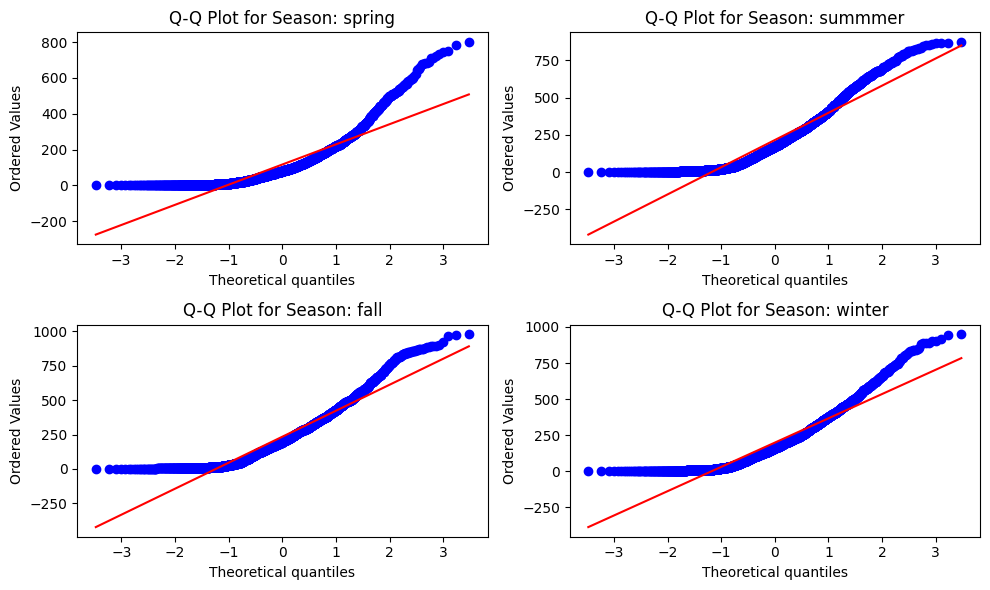

In [12]:
# Normality Check Using Q-Q Plots

grp = list(data['season'].unique())
alpha = .05

fig,axes = plt.subplots(2, 2, figsize = (10, 6))
axes = axes.flatten()

for idx, i in enumerate(grp):
    data_1 = data[data['season'] == i]['count']

    # Create Q-Q plot on respective subplot axis
    stats.probplot(data_1, dist="norm", plot=axes[idx])

    # Set title for each subplot
    axes[idx].set_title(f'Q-Q Plot for Season: {i}')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

<b> Data does not follow Gaussian Distribution </b>

In [13]:
# Variance Check

alpha = .05
lev_df = [data[data['season'] == i]['count'] for i in grp]

stat, pval = levene(*lev_df)
print(f'stat : {stat} \np value: {pval}')

if pval < alpha:
  print('Variance are not equal')
else:
  print('Variance are equal')

stat : 187.7706624026276 
p value: 1.0147116860043298e-118
Variance are not equal


<b><i>Since the Normality check and Variance Check for the data has failed, One-Way ANOVA test cannot be applied</i></b>

In [14]:
from scipy.stats import kruskal
alpaha = .05
stat, pval = kruskal(*lev_df)
print(f'stat : {stat} \np value: {pval}')
if pval < alpha:
  print('There is significant differnce in demand for bike in different seasons')
else:
  print('There is no significant differnce in demand for bike in different seasons')

stat : 699.6668548181988 
p value: 2.479008372608633e-151
There is significant differnce in demand for bike in different seasons


3. The demand of bicycles on rent is the same or differnt for different Weather conditions

```
H0: There is no significant differnce in demand for bike in different weather.
H1: There is a significant differnce in demand for bike in different weather.
```
Steps:
1. Normality Check - Perform Shapiro-Silk Test or using Q-Q plot
2. Variance Check - Perform Levene Test

if the data follows both the test, perform One-way ANOVA else, perform Kruskal Wallis Test.

* Normalty Check:
```
H0: Data follows Gaussian Distribution
H1: Data does not follows Gaussian Distribution
```
* Variance Check:
```
H0: Variance are equal
H1: Variance are not equal
```

In [15]:
data['weather'].unique()

array(['clear/partly cloudy', 'cloudy/mist', 'light rain/snow',
       'heavy rain/snow/thunderstorm'], dtype=object)

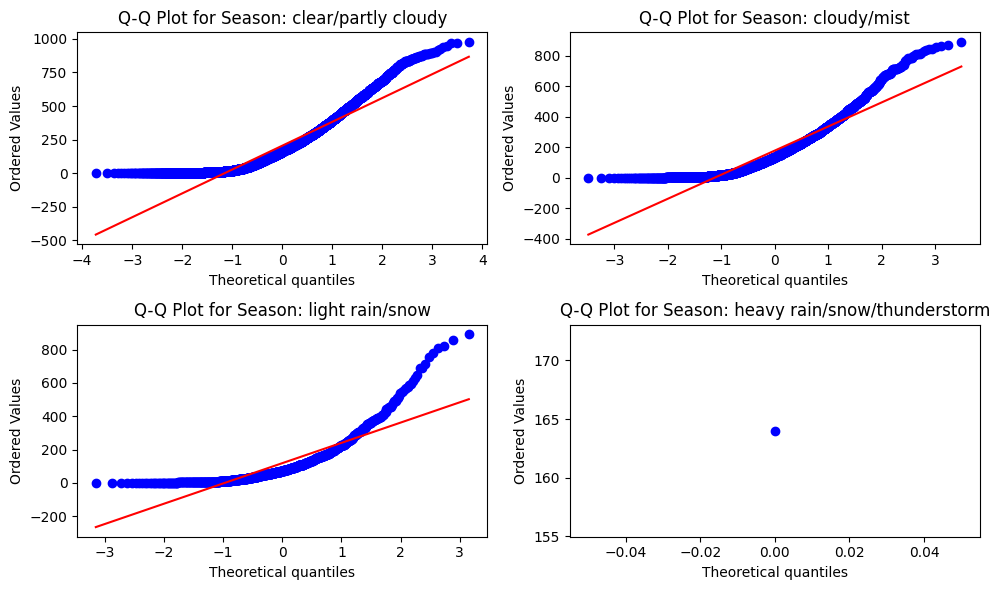

In [16]:
# Normality Check Using Q-Q Plots

grp = list(data['weather'].unique())
alpha = .05

fig,axes = plt.subplots(2, 2, figsize = (10, 6))
axes = axes.flatten()

for idx, i in enumerate(grp):
    data_1 = data[data['weather'] == i]['count']

    # Create Q-Q plot on respective subplot axis
    stats.probplot(data_1, dist="norm", plot=axes[idx])

    # Set title for each subplot
    axes[idx].set_title(f'Q-Q Plot for Season: {i}')

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

In [17]:
# Variance Check

alpha = .05
lev_df = [data[data['weather'] == i]['count'] for i in grp]

stat, pval = levene(*lev_df)
print(f'stat : {stat} \np value: {pval}')

if pval < alpha:
  print('Variance are not equal')
else:
  print('Variance are equal')

stat : 54.85106195954556 
p value: 3.504937946833238e-35
Variance are not equal


<b><i> The data does not follow Gaussian Distribution and also the variance between the groups are not equal. Performing Kruskal Wallis Test to check for hypothesis established </i></b>


In [18]:
from scipy.stats import kruskal
alpaha = .05
stat, pval = kruskal(*lev_df)
print(f'stat : {stat} \np value: {pval}')
if pval < alpha:
  print('There is significant differnce in demand for bike in different weather')
else:
  print('There is no significant differnce in demand for bike in different weather')

stat : 205.00216514479087 
p value: 3.501611300708679e-44
There is significant differnce in demand for bike in different weather


4. The Weather conditions are significantly different during different Seasons

Since both the columns <b>`Season`</b> and <b>`Weather`</b> are categorical data types the test applied will be <b> Chi-Square</b> Test.

```
H0: The Weather is independent of the Season.
H1: The Weather and Season are dependent on each other.

```


In [19]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['season'], data['weather'])
contingency_table


weather,clear/partly cloudy,cloudy/mist,heavy rain/snow/thunderstorm,light rain/snow
season,,,,
fall,1930,604,0,199
spring,1759,715,1,211
summmer,1801,708,0,224
winter,1702,807,0,225


In [21]:
stat, pval, dof, expected = chi2_contingency(contingency_table)
alpha = .05
print(f'stat : {stat} \np value: {pval}')
print(f'degree of freedom : {dof}')
print(f'expected : {expected}')


stat : 49.15865559689363 
p value: 1.5499250736864862e-07
degree of freedom : 9
expected : [[1.80559765e+03 7.11493845e+02 2.51056403e-01 2.15657450e+02]
 [1.77454639e+03 6.99258130e+02 2.46738931e-01 2.11948742e+02]
 [1.80559765e+03 7.11493845e+02 2.51056403e-01 2.15657450e+02]
 [1.80625831e+03 7.11754180e+02 2.51148264e-01 2.15736359e+02]]


In [22]:
if pval < alpha:
  print('The Weather and Season are dependent on each other')
else:
  print('The Weather is independent of the Season')

The Weather and Season are dependent on each other


The concludes that the Weather and Season are dependent on each other and will simultaneously contribute to the bike renting business.